# ADASYN (Adaptive Synthetic Sampling) pada dataset yang tidak seimbang (imbalanced)

## 1. Membuat Dataset Tidak Seimbang

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np

# Memuat dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Mengubah menjadi DataFrame untuk kemudahan manipulasi
df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Mengambil semua data untuk kelas versicolor (50) dan virginica (50)
df_versicolor = df[df['species'] == 'versicolor']
df_virginica = df[df['species'] == 'virginica']

# Mengambil hanya 15 data untuk kelas setosa
df_setosa = df[df['species'] == 'setosa'].sample(15, random_state=42)

# Menggabungkan kembali untuk membuat dataset tidak seimbang
df_imbalanced = pd.concat([df_setosa, df_versicolor, df_virginica])

# Memisahkan fitur (X) dan target (y)
X_imbalanced = df_imbalanced[iris.feature_names].values
y_imbalanced = df_imbalanced['target'].astype('int').values

# Menampilkan distribusi kelas yang baru
print("Distribusi kelas setelah dibuat tidak seimbang:")
print(pd.Series(y_imbalanced).value_counts())

Distribusi kelas setelah dibuat tidak seimbang:
1    50
2    50
0    15
Name: count, dtype: int64


## 2. Visualisasi PCA 2D (Sebelum Oversampling)

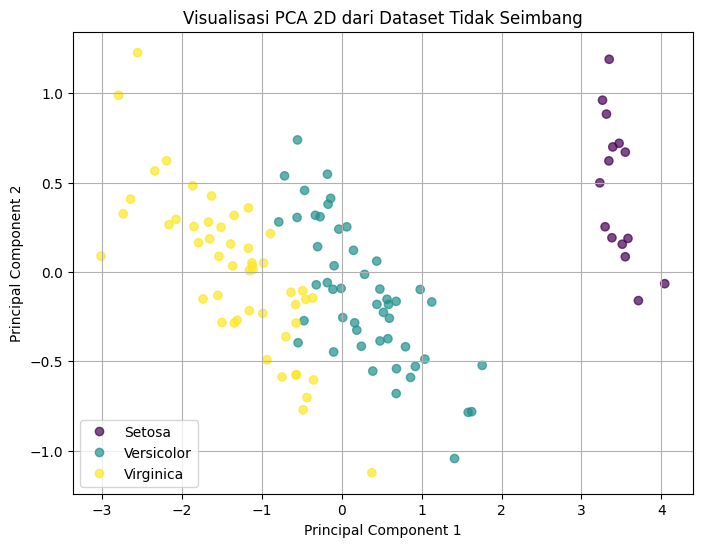

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 2 komponen
pca = PCA(n_components=2)
X_pca_imbalanced = pca.fit_transform(X_imbalanced)

# Plotting
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_imbalanced[:, 0], X_pca_imbalanced[:, 1], c=y_imbalanced, cmap='viridis', alpha=0.7)
plt.title('Visualisasi PCA 2D dari Dataset Tidak Seimbang')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['Setosa', 'Versicolor', 'Virginica'])
plt.grid(True)
plt.show()

## Persiapa Data

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

# --- Langkah 1: Persiapan Data (dari kode sebelumnya) ---
# Memuat dataset Iris dan membuatnya tidak seimbang
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df_versicolor = df[df['target'] == 1]
df_virginica = df[df['target'] == 2]
df_setosa = df[df['target'] == 0].sample(15, random_state=42)
df_imbalanced = pd.concat([df_setosa, df_versicolor, df_virginica])
X_imbalanced = df_imbalanced.drop('target', axis=1).values
y_imbalanced = df_imbalanced['target'].values

# Menyeimbangkan data dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imbalanced, y_imbalanced)

# Membagi data yang sudah seimbang menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

## Inisialisasi Model Individual dan Ensemble

In [4]:
# 1. Inisialisasi Naive Bayes (Estimator 1)
clf_nb = GaussianNB()

# 2. Inisialisasi SVM (Estimator 2)
clf_svm = SVC(kernel='linear', random_state=42)

# 3. Inisialisasi Ensemble Voting Classifier
# Menggabungkan Naive Bayes ('nb') dan SVM ('svm')
ensemble_model = VotingClassifier(
    estimators=[('nb', clf_nb), ('svm', clf_svm)],
    voting='hard' # 'hard' voting berarti prediksi berdasarkan suara mayoritas
)

## Melatih dan Mengevaluasi Setiap Model

In [5]:
# Melatih dan mengevaluasi Naive Bayes
clf_nb.fit(X_train, y_train)
y_pred_nb = clf_nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Akurasi Model Naive Bayes: {acc_nb:.4f}")
print("Laporan Klasifikasi Naive Bayes:")
print(classification_report(y_test, y_pred_nb, target_names=iris.target_names))

# Melatih dan mengevaluasi SVM
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"\nAkurasi Model SVM: {acc_svm:.4f}")
print("Laporan Klasifikasi SVM:")
print(classification_report(y_test, y_pred_svm, target_names=iris.target_names))

# Melatih dan mengevaluasi Model Ensemble
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
acc_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"\nAkurasi Model Ensemble (Voting): {acc_ensemble:.4f}")
print("Laporan Klasifikasi Ensemble (Voting):")
print(classification_report(y_test, y_pred_ensemble, target_names=iris.target_names))


Akurasi Model Naive Bayes: 0.9111
Laporan Klasifikasi Naive Bayes:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


Akurasi Model SVM: 1.0000
Laporan Klasifikasi SVM:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Akurasi Model Ensemble (Voting): 0.9333
Laporan Klasifikasi Ensemble (Voting):
              precision    recall  f1-s

## 3. Oversampling dengan ADASYN

In [6]:
# Ganti baris import ADASYN
# from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE # <-- Ganti dengan ini

# Ganti inisialisasi ADASYN
# adasyn = ADASYN(random_state=42)
smote = SMOTE(random_state=42) # <-- Ganti dengan ini

# Melakukan oversampling pada data menggunakan SMOTE
X_resampled, y_resampled = smote.fit_resample(X_imbalanced, y_imbalanced)

# Menampilkan distribusi kelas setelah SMOTE
print("\nDistribusi kelas setelah SMOTE:")
print(pd.Series(y_resampled).value_counts())


Distribusi kelas setelah SMOTE:
0    50
1    50
2    50
Name: count, dtype: int64


## 4. Proses Klasifikasi dan Evaluasi


--- Laporan Klasifikasi pada Dataset TIDAK SEIMBANG ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35


--- Laporan Klasifikasi pada Dataset SEIMBANG (ADASYN) ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



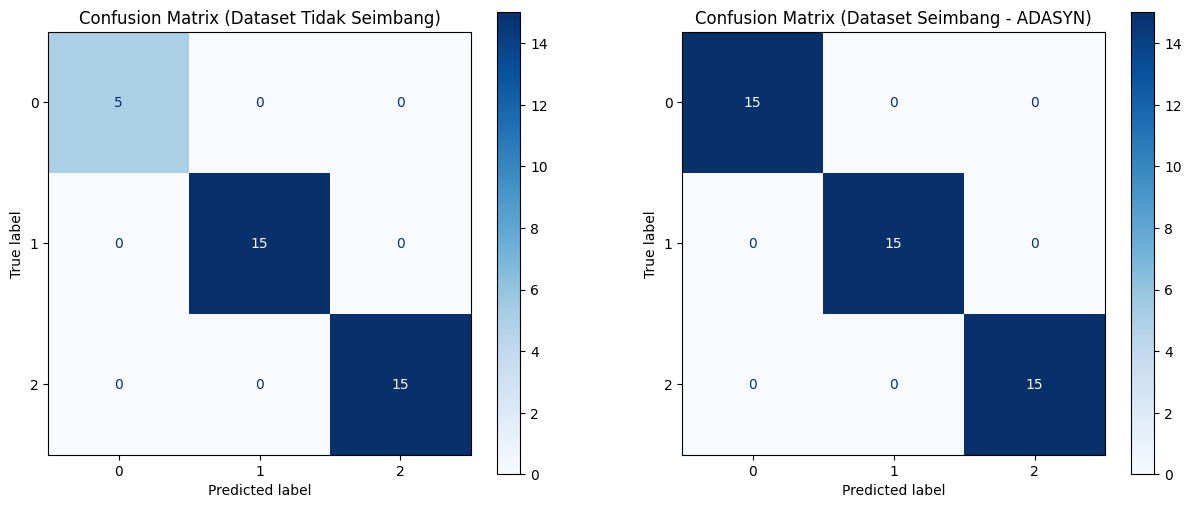

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# ---- 1. Klasifikasi pada Dataset TIDAK SEIMBANG ----
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imbalanced, y_imbalanced, test_size=0.3, random_state=42, stratify=y_imbalanced)

model_imb = SVC(kernel='linear', probability=True, random_state=42)
model_imb.fit(X_train_imb, y_train_imb)
y_pred_imb = model_imb.predict(X_test_imb)

print("\n--- Laporan Klasifikasi pada Dataset TIDAK SEIMBANG ---")
print(classification_report(y_test_imb, y_pred_imb, target_names=target_names))

# ---- 2. Klasifikasi pada Dataset SEIMBANG (Hasil ADASYN) ----
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

model_res = SVC(kernel='linear', probability=True, random_state=42)
model_res.fit(X_train_res, y_train_res)
y_pred_res = model_res.predict(X_test_res)

print("\n--- Laporan Klasifikasi pada Dataset SEIMBANG (ADASYN) ---")
print(classification_report(y_test_res, y_pred_res, target_names=target_names))

# Menampilkan Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title('Confusion Matrix (Dataset Tidak Seimbang)')
ConfusionMatrixDisplay.from_estimator(model_imb, X_test_imb, y_test_imb, ax=axes[0], cmap='Blues')
axes[1].set_title('Confusion Matrix (Dataset Seimbang - ADASYN)')
ConfusionMatrixDisplay.from_estimator(model_res, X_test_res, y_test_res, ax=axes[1], cmap='Blues')
plt.show()